# Project Brief
The Digital Challenge<br>
The digital world is evolving, and so are Vanguard’s clients. Vanguard believed that a more intuitive and modern User Interface (UI), coupled with timely in-context prompts (cues, messages, hints, or instructions provided to users directly within the context of their current task or action), could make the online process smoother for clients. The critical question was: Would these changes encourage more clients to complete the process?
An A/B test was set into motion from 3/15/2017 to 6/20/2017 by the team.

Control Group: Clients interacted with Vanguard’s traditional online process.

Test Group: Clients experienced the new, spruced-up digital interface.

Both groups navigated through an identical process sequence: an initial page, three subsequent steps, and finally, a confirmation page signaling process completion.<br>
The goal is to see if the new design leads to a better user experience and higher process completion rates.


Answer the following questions about demographics:
Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?
Next, carry out a client behaviour analysis to answer any additional relevant questions you think are important.

### Columns
<br>client_id: Every client’s unique ID.
<br>variation: Indicates if a client was part of the experiment.
<br>visitor_id: A unique ID for each client-device combination.
<br>visit_id: A unique ID for each web visit/session.
<br>process_step: Marks each step in the digital process.
<br>date_time: Timestamp of each web activity.
<br>clnt_tenure_yr: Represents how long the client has been with Vanguard, measured in years.
<br>clnt_tenure_mnth: Further breaks down the client’s tenure with Vanguard in months.
<br>clnt_age: Indicates the age of the client.
<br>gendr: Specifies the client’s gender.
<br>num_accts: Denotes the number of accounts the client holds with Vanguard.
<br>bal: Gives the total balance spread across all accounts for a particular client.
<br>calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
<br>logons_6_mnth: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.


## Setup

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functions import *
%matplotlib inline
import os

In [49]:
print(os.getcwd())

/Users/leilajavanmardi/Desktop/Leila/Coding_IronHack/Data_Analytics_Bootcamp/week5/Project/notebooks


In [50]:
# relative pass should be 
path1 = "df_final_demo.txt"
path2 = "df_final_experiment_clients.txt"
path3 = "df_final_web_data_pt_1.txt"
path4 = "df_final_web_data_pt_2.txt"

df_demo = pd.read_csv(path1)
df_exp = pd.read_csv(path2)
df_web_1 = pd.read_csv(path3)
df_web_2 = pd.read_csv(path4)

# Initial Exploration and Cleaning

## Demo dataset

In [51]:
print(f'The data set has {df_demo.shape[0]} rows and {df_demo.shape[1]} columns with the following types:')
print(df_demo.dtypes)
df_demo.sort_values(by = 'client_id', inplace = True)
df_demo.reset_index( drop=True, inplace= True)
df_demo.sample(5)

The data set has 70609 rows and 9 columns with the following types:
client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
37577,5331374,14.0,168.0,47.5,F,2.0,33072.41,1.0,4.0
3140,442772,11.0,139.0,62.0,M,2.0,179215.69,2.0,5.0
47077,6664539,6.0,77.0,22.5,U,2.0,29265.70,3.0,3.0
57962,8189770,15.0,180.0,35.5,F,2.0,60714.39,4.0,7.0
28624,4057075,13.0,166.0,54.5,M,2.0,34295.02,0.0,3.0


## Experiment dataset

In [52]:
print(f'The data set has {df_exp.shape[0]} rows and {df_exp.shape[1]} columns with the following types:')
print(df_exp.dtypes)
df_exp.sort_values(by = 'client_id', inplace = True)
df_exp.reset_index(drop = True, inplace = True)
df_exp.sample(5)

The data set has 70609 rows and 2 columns with the following types:
client_id     int64
Variation    object
dtype: object


,client_id,Variation
1916,268509,Control
5231,739542,NaN
107,15708,NaN
27890,3960005,NaN
18981,2709749,NaN


### Merging Demo and Expriment 

In [53]:
df=pd.merge(df_demo,df_exp, on='client_id')
print(f'The data set has {df.shape[0]} rows and {df.shape[1]} columns with the following types:')
print(df.dtypes)
df.head(5)

The data set has 70609 rows and 10 columns with the following types:
client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
Variation            object
dtype: object


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,NaN
1,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test
2,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test
3,722,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,NaN
4,934,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Test


In [54]:
# null values
print(f'The number of null values in Demo_Expriment dataset:')
print(df.isna().sum())

#nunique 
print(f'\nThe number of unique values in Demo dataset:')
for column in df_demo.columns:
    print(f'column {column} has {df_demo[column].nunique()}')

# unique values for selected columns
df_col_unique = ['gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation']
print(f'\nUnique values in Demo_Expriment:')

for column in df_col_unique:
    unique_values = df[column].unique()
    print(f'column {column}: {unique_values}')

The number of null values in Demo_Expriment dataset:
client_id               0
clnt_tenure_yr         14
clnt_tenure_mnth       14
clnt_age               15
gendr                  14
num_accts              14
bal                    14
calls_6_mnth           14
logons_6_mnth          14
Variation           20109
dtype: int64

The number of unique values in Demo dataset:
column client_id has 70609
column clnt_tenure_yr has 54
column clnt_tenure_mnth has 482
column clnt_age has 165
column gendr has 4
column num_accts has 8
column bal has 70328
column calls_6_mnth has 8
column logons_6_mnth has 9

Unique values in Demo_Expriment:
column gendr: ['M' 'U' 'F' nan 'X']
column num_accts: [ 2.  3.  5.  4.  6.  8. nan  7.  1.]
column bal: [501570.72  25454.66  30525.8  ... 107059.74 431887.61  67425.35]
column calls_6_mnth: [ 4.  2.  0.  1.  6.  5.  3.  7. nan]
column logons_6_mnth: [ 4.  6.  1.  3.  9.  5.  8.  7.  2. nan]
column Variation: [nan 'Test' 'Control']


In [55]:
# initial analysis of numeric columns
print('\n')
df_numeric = df.select_dtypes(include=['number']).drop(columns = 'client_id')
numeric_col = list(df_numeric.columns)
df_numeric.describe().round(2)

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,70595.00,70595.00,70594.00,70595.00,70595.00,70595.00,70595.00
mean,12.05,150.66,46.44,2.26,147445.24,3.38,5.57
std,6.87,82.09,15.59,0.53,301508.71,2.24,2.35
min,2.00,33.00,13.50,1.00,13789.42,0.00,1.00
25%,6.00,82.00,32.50,2.00,37346.84,1.00,4.00
50%,11.00,136.00,47.00,2.00,63332.90,3.00,5.00
75%,16.00,192.00,59.00,2.00,137544.90,6.00,7.00
max,62.00,749.00,96.00,8.00,16320040.15,7.00,9.00


### Cleaning process

In [56]:
# dropping of the dublications and handling NaN values in Gender and Variation columns
df_clean = cleaning_gender(df)
df_clean = drop_dub(df_clean)
df_clean =cleaning_Variation(df_clean)

In [57]:
df_clean.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr                0
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
variation            0
dtype: int64

In [58]:
df_clean.describe(include='all').drop(columns = 'client_id').round(2)

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
count,70595.00,70595.00,70594.00,70609,70595.00,70595.00,70595.00,70595.00,70609
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,Test
freq,NaN,NaN,NaN,24139,NaN,NaN,NaN,NaN,26968
mean,12.05,150.66,46.44,NaN,2.26,147445.24,3.38,5.57,NaN
std,6.87,82.09,15.59,NaN,0.53,301508.71,2.24,2.35,NaN
min,2.00,33.00,13.50,NaN,1.00,13789.42,0.00,1.00,NaN
25%,6.00,82.00,32.50,NaN,2.00,37346.84,1.00,4.00,NaN
50%,11.00,136.00,47.00,NaN,2.00,63332.90,3.00,5.00,NaN
75%,16.00,192.00,59.00,NaN,2.00,137544.90,6.00,7.00,NaN


In [59]:
print(f'Mode for years : {df_clean.clnt_tenure_yr.mode()[0]}')
print(f'\nMode for months : {df_clean.clnt_tenure_mnth.mode()[0]}')
print(f'\nMode for age : {df_clean.clnt_age.mode()[0]}')
print(f'\nMode for calls_6_mnth : {df_clean.calls_6_mnth.mode()[0]}')
print(f'\nMode for logons_6_mnth : {df_clean.logons_6_mnth.mode()[0]}')

Mode for years : 6.0

Mode for months : 58.0

Mode for age : 58.5

Mode for calls_6_mnth : 6.0

Mode for logons_6_mnth : 9.0


In [60]:
#Based on the initial statistical analysis, missing values in some of our numeric columns were replaced with the median
df_clean= Null_Median(df_clean,'clnt_tenure_mnth')
df_clean= Null_Median(df_clean,'clnt_tenure_yr')
df_clean= Null_Median(df_clean,'clnt_age')
df_clean= Null_Median(df_clean,'calls_6_mnth')
df_clean= Null_Median(df_clean,'logons_6_mnth')

# We chose to drop the rows in the remaing two columns (num_accts and bal) which only have 14 NaN values each
df_clean.dropna(inplace=True, ignore_index=True)
df_clean.tail(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
70590,9999400,7.0,86.0,28.5,U,2.0,51787.04,0.0,3.0,Test
70591,9999626,9.0,113.0,35.0,M,2.0,36642.88,6.0,9.0,Test
70592,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
70593,9999832,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,Test
70594,9999839,13.0,160.0,28.5,F,2.0,67425.35,3.0,3.0,Unknown


In [61]:
print(f'The data set has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns with the following types:')
print(df_clean.dtypes)
print(df_clean.isna().sum())

The data set has 70595 rows and 10 columns with the following types:
client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
variation            object
dtype: object
client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
variation           0
dtype: int64


In [62]:
df_clean.describe(include='all').drop(columns='client_id').round(2)

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
count,70595.00,70595.00,70595.00,70595,70595.00,70595.00,70595.00,70595.00,70595
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,Test
freq,NaN,NaN,NaN,24125,NaN,NaN,NaN,NaN,26961
mean,12.05,150.66,46.44,NaN,2.26,147445.24,3.38,5.57,NaN
std,6.87,82.09,15.59,NaN,0.53,301508.71,2.24,2.35,NaN
min,2.00,33.00,13.50,NaN,1.00,13789.42,0.00,1.00,NaN
25%,6.00,82.00,32.50,NaN,2.00,37346.84,1.00,4.00,NaN
50%,11.00,136.00,47.00,NaN,2.00,63332.90,3.00,5.00,NaN
75%,16.00,192.00,59.00,NaN,2.00,137544.90,6.00,7.00,NaN


## Web dataset

#### Merging the Web datasets

In [63]:
print(df_web_1.shape)
df_web_1.head(2)

(343141, 5)


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51


In [64]:
print(df_web_2.shape)
df_web_2.tail(2)

(412264, 5)


,client_id,visitor_id,visit_id,process_step,date_time
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34
412263,674799,947159805_81558194550,86152093_47511127657_716022,start,2017-06-03 12:17:09


In [65]:
# merging the 2 datasets
df_web = pd.concat([df_web_1,df_web_2 ])

In [66]:
df_web.sort_values(by='client_id', inplace = True)
df_web.reset_index(drop= True, inplace= True)
print(f'The data set has {df_web.shape[0]} rows and {df_web.shape[1]} columns with the following types:')
print(df_web.dtypes)

The data set has 755405 rows and 5 columns with the following types:
client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object


In [67]:
# unique values 
print(f'\nThe number of unique values in Web dataset:')
for column in df_web.columns:
    print(f'column {column} has {df_web[column].nunique()}')
    
unique_values_web = df_web.process_step.unique()
print(f'\ncolumn process_step has : {unique_values_web} as Unique values')


The number of unique values in Web dataset:
column client_id has 120157
column visitor_id has 130236
column visit_id has 158095
column process_step has 5
column date_time has 629363

column process_step has : ['step_3' 'confirm' 'step_2' 'step_1' 'start'] as Unique values


In [68]:
df_web.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [69]:
df_web.describe(include='object')

,visitor_id,visit_id,process_step,date_time
count,755405,755405,755405,755405
unique,130236,158095,5,629363
top,722943003_3441581446,875138661_34710212496_881092,start,2017-05-02 10:08:31
freq,104,104,243945,24


In [70]:
df_web[(df_web.client_id == 5574879) ].groupby(['visit_id','visitor_id','process_step']).count()

client_id  \
visit_id                     visitor_id           process_step              
275082714_55557368423_975860 837958338_6079136567 confirm               1   
                                                  start                 2   
                                                  step_1                2   
                                                  step_2                1   
                                                  step_3                1   
875138661_34710212496_881092 722943003_3441581446 confirm              16   
                                                  step_1               40   
                                                  step_2               24   
                                                  step_3               24   

                                                                date_time  
visit_id                     visitor_id           process_step             
275082714_55557368423_975860 837958338_6079136567 confirm               1  
                                                  start                 2  
                                                  step_1                2  
                                                  step_2                1  
                                                  step_3                1  
875138661_34710212496_881092 722943003_3441581446 confirm              16  
                                                  step_1               40  
                                                  step_2               24  
                                                  step_3               24

In [71]:
df_web.groupby('client_id').count().sort_values(by='visit_id', ascending=False)

,visitor_id,visit_id,process_step,date_time
client_id,,,,
5574879,111,111,111,111
2274658,90,90,90,90
2128341,84,84,84,84
1595223,81,81,81,81
5951379,81,81,81,81
...,...,...,...,...
5294883,1,1,1,1
6334724,1,1,1,1
3259983,1,1,1,1


df_web_clean = df_web.drop(columns=['visitor_id','visit_id']).reset_index(drop=True)

In [72]:
df_web_clean=df_web.copy()
df_web_clean['date_time'] = pd.to_datetime(df_web_clean['date_time'])
df_web_clean.drop_duplicates().reset_index(drop=True, inplace=True)
df_web_clean.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [73]:
df_web_clean.tail(5)

,client_id,visitor_id,visit_id,process_step,date_time
755400,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
755401,9999875,738878760_1556639849,931268933_219402947_599432,confirm,2017-06-01 22:48:39
755402,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58
755403,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28
755404,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47


In [74]:
step_durations1 = df_web_clean.groupby(['visit_id', 'visitor_id'])[['date_time']].count()
step_durations1

,,date_time
visit_id,visitor_id,
100012776_37918976071_457913,451664975_1722933822,2
1000165_4190026492_760066,306992881_89423906595,5
100019538_17884295066_43909,612065484_94198474375,11
100022086_87870757897_149620,754122351_18568832435,5
100030127_47967100085_936361,676020267_36602664238,1
...,...,...
999986292_55082159911_561557,339629093_15796635997,2
999988789_76411676596_272843,730634087_44272418812,5
999989069_52203656268_170206,614972736_12303688756,2


In [75]:
df_web_clean[df_web_clean.visit_id =='100019538_17884295066_43909'].sort_values(by= 'date_time', ascending= False)

,client_id,visitor_id,visit_id,process_step,date_time
554501,7338123,612065484_94198474375,100019538_17884295066_43909,confirm,2017-04-09 16:24:58
554508,7338123,612065484_94198474375,100019538_17884295066_43909,step_3,2017-04-09 16:24:01
554516,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:22:08
554515,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04
554514,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59
554513,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45
554505,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41
554504,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35
554503,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21
554502,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12


In [76]:
df_web_clean[df_web_clean.visitor_id =='483112224_46340533900'].sort_values(by= 'date_time', ascending= False)

,client_id,visitor_id,visit_id,process_step,date_time
539963,7149380,483112224_46340533900,999992932_41666455053_671149,confirm,2017-06-06 16:05:34
539957,7149380,483112224_46340533900,999992932_41666455053_671149,confirm,2017-06-06 16:04:08
539958,7149380,483112224_46340533900,999992932_41666455053_671149,step_3,2017-06-06 16:01:46
539960,7149380,483112224_46340533900,999992932_41666455053_671149,step_2,2017-06-06 15:47:32
539961,7149380,483112224_46340533900,999992932_41666455053_671149,step_1,2017-06-06 15:46:24
539962,7149380,483112224_46340533900,999992932_41666455053_671149,start,2017-06-06 15:46:03
539955,7149380,483112224_46340533900,974166939_36217549685_984623,start,2017-05-26 13:26:34
539959,7149380,483112224_46340533900,743304693_52856049499_168801,step_1,2017-05-24 16:24:32
539956,7149380,483112224_46340533900,743304693_52856049499_168801,start,2017-05-24 16:24:27


In [77]:
df_web_confirm= df_web_clean[df_web_clean.process_step == 'confirm'].reset_index(drop=True)

### Client Behavior Analysis
Who are the primary clients using this online process?<br>
Are the primary clients younger or older, new or long-standing?<br>
Next, carry out a client behaviour analysis to answer any additional relevant questions you think are important.


In [78]:
#Who are the primary clients using this online process?
visit_frequency = df_web_clean[['visitor_id','client_id']].value_counts().reset_index()
visit_frequency = pd.DataFrame(visit_frequency)
visit_frequency.drop(columns=['client_id']).describe()

,count
count,131899.000000
mean,5.727147
std,3.596061
min,1.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,104.000000


In [79]:
top_visitor = visit_frequency[visit_frequency['count'] > 7]
top_visitor_df = pd.merge(top_visitor, df_clean, on='client_id')

top_visitor_df

,visitor_id,client_id,count,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,722943003_3441581446,5574879,104,9.0,112.0,28.5,M,2.0,18136.48,7.0,7.0,Unknown
1,857376424_12378092455,2274658,90,5.0,65.0,34.0,U,2.0,78389.93,6.0,9.0,Control
2,272742682_16716805486,1595223,81,23.0,279.0,83.0,M,3.0,1291698.48,5.0,8.0,Test
3,780189529_68744403580,1952790,80,30.0,361.0,60.0,F,4.0,1249006.06,5.0,8.0,Control
4,78799102_14329268381,5951379,80,7.0,89.0,27.0,U,2.0,34807.48,6.0,9.0,Control
...,...,...,...,...,...,...,...,...,...,...,...,...
15302,23492098_22785911448,4602276,8,5.0,60.0,38.5,U,2.0,33763.86,1.0,4.0,Control
15303,104663695_68270640965,5423767,8,9.0,119.0,58.0,M,2.0,44819.45,2.0,2.0,Unknown
15304,222446585_73471697225,7294986,8,9.0,109.0,53.5,M,2.0,130083.05,5.0,8.0,Control
15305,951593913_56194433289,9928912,8,7.0,89.0,20.5,U,2.0,51176.51,6.0,9.0,Test


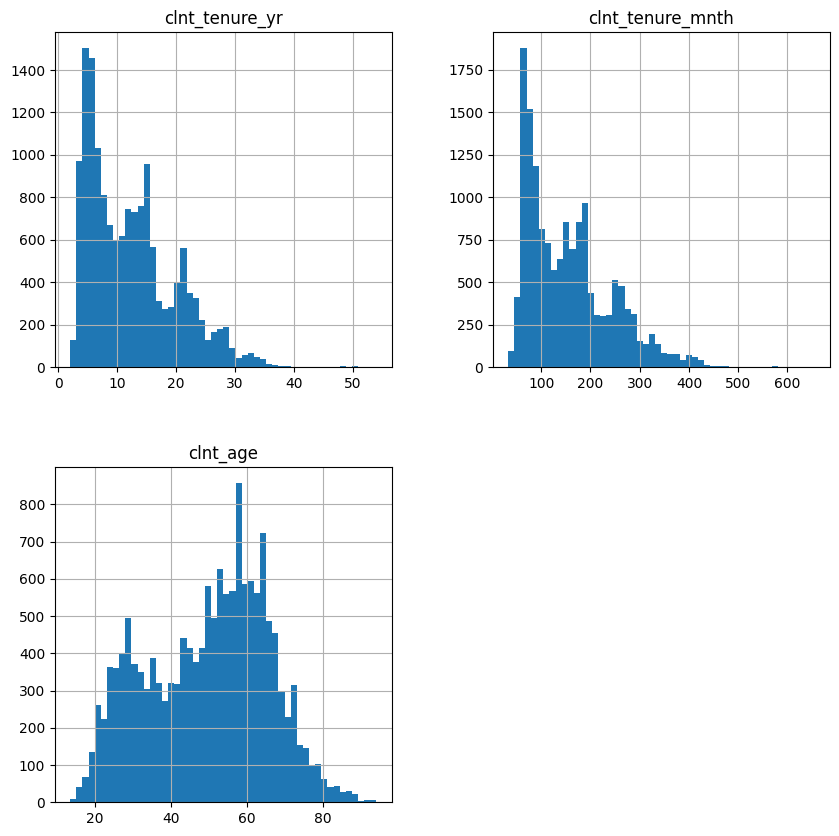

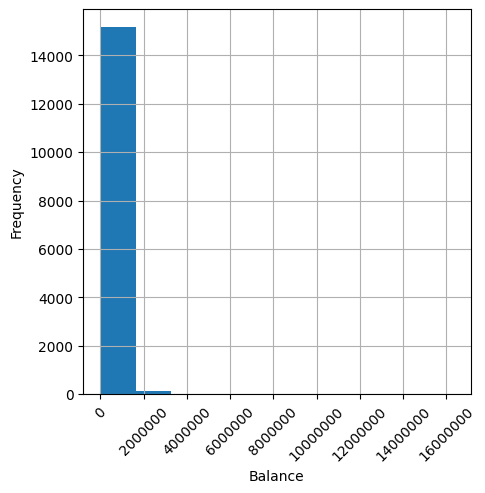

'\nsns.boxplot(data=df[\'bal\'], color="blue")\nplt.xlabel(\'Balance\')  # Label for x-axis\nplt.ylabel(\'Values\')   # Label for y-axis\nplt.ticklabel_format(style=\'plain\', axis=\'y\')  # Disable scientific notation for y-axis\nplt.show()\n\n'

In [80]:
columns_to_plot = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', ]

top_visitor_df[columns_to_plot].hist(figsize=(10,10), bins=50, xlabelsize=10, ylabelsize=10)
plt.show()

plt.figure(figsize=(5, 5))
top_visitor_df['bal'].hist(bins=10)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation for x-axis
plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability
plt.show()

'''
sns.boxplot(data=df['bal'], color="blue")
plt.xlabel('Balance')  # Label for x-axis
plt.ylabel('Values')   # Label for y-axis
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation for y-axis
plt.show()

'''


columns_to_plot = ['num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation']

for i, col in enumerate(columns_to_plot):
    sns.barplot(x=top_visitor_df.index, y=col, data=top_visitor_df)

columns_to_plot = ['num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation']

#sns.countplot(data=top_visitor_df, x='bal', hue='num_accts', )
sns.barplot(x=top_visitor_df.index, y=top_visitor_df.calls_6_mnth);

### Performance Metrics
Success Indicators

Time Spent on Each Step: The average duration users spend on each step.

Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

Redesign Outcome
Based on the chosen KPIs, how does the new design’s performance compare to the old one?



#### Completion Rate

In [81]:
num_user_confirm= df_web_clean[df_web_clean.process_step == 'confirm']['client_id'].nunique()
total_users = df_web_clean['client_id'].nunique()
completion_rate = round((num_user_confirm / total_users)*100,2)
print(f'The number of users who reached the confirm step is {num_user_confirm} and the number of total users is {total_users}')
print (f'The completion rate is {completion_rate}')

The number of users who reached the confirm step is 81145 and the number of total users is 120157
The completion rate is 67.53


-- this is old way should be deleted
frecuenc_table = pd.crosstab(index =df_web_clean.process_step, columns='count_step')
frecuenc_table = frecuenc_table.reset_index()
frecuenc_table['conversion_rate'] = round((frecuenc_table['count_step'] /  df_web_clean['client_id'].nunique()) * 100,1)
frecuenc_table

#### Time Spent on Each Step

The average duration users spend on each step.


In [93]:
df_web_time = df_web_clean.groupby(['client_id','visit_id', 'process_step'])[['date_time']].mean().sort_values(by='date_time', ascending=False)
df_web_time

date_time
client_id visit_id                     process_step                    
4227031   694062705_73082073487_259240 start        2017-06-20 23:59:57
5640210   959123368_90077952691_695747 start        2017-06-20 23:59:53
4159912   358114812_31313949217_790854 step_2       2017-06-20 23:59:23
                                       step_1       2017-06-20 23:59:00
                                       start        2017-06-20 23:58:40
...                                                                 ...
7179755   264484508_5982901710_928530  step_3       2017-03-15 00:23:47
                                       step_2       2017-03-15 00:22:52
                                       step_1       2017-03-15 00:20:50
                                       start        2017-03-15 00:19:28
9088444   423038079_46067236368_400417 step_3       2017-03-15 00:03:03

[557614 rows x 1 columns]

In [104]:
df_web_time3 = df_web_clean.groupby(['client_id','visit_id', 'process_step'])[['date_time']].mean().sort_values(by='date_time', ascending=True)
df_web_time3['time_diff'] = df_web_time3['date_time'].diff()
df_web_time3

date_time  \
client_id visit_id                     process_step                       
9088444   423038079_46067236368_400417 step_3       2017-03-15 00:03:03   
7179755   264484508_5982901710_928530  start        2017-03-15 00:19:28   
                                       step_1       2017-03-15 00:20:50   
                                       step_2       2017-03-15 00:22:52   
                                       step_3       2017-03-15 00:23:47   
...                                                                 ...   
4159912   358114812_31313949217_790854 start        2017-06-20 23:58:40   
                                       step_1       2017-06-20 23:59:00   
                                       step_2       2017-06-20 23:59:23   
5640210   959123368_90077952691_695747 start        2017-06-20 23:59:53   
4227031   694062705_73082073487_259240 start        2017-06-20 23:59:57   

                                                          time_diff  
client_id visit_id                     process_step                  
9088444   423038079_46067236368_400417 step_3                   NaT  
7179755   264484508_5982901710_928530  start        0 days 00:16:25  
                                       step_1       0 days 00:01:22  
                                       step_2       0 days 00:02:02  
                                       step_3       0 days 00:00:55  
...                                                             ...  
4159912   358114812_31313949217_790854 start        0 days 00:01:34  
                                       step_1       0 days 00:00:20  
                                       step_2       0 days 00:00:23  
5640210   959123368_90077952691_695747 start        0 days 00:00:30  
4227031   694062705_73082073487_259240 start        0 days 00:00:04  

[557614 rows x 2 columns]

In [117]:
df_web_clean_sorted = df_web_clean.sort_values(by=['client_id','visitor_id','visit_id','date_time']).copy()
df_web_clean_sorted.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
4,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
3,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
0,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
1,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
5,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:26:55
6,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:42:43
7,546,475037402_89828530214,731811517_9330176838_94847,start,2017-06-17 10:03:29
8,546,475037402_89828530214,731811517_9330176838_94847,step_1,2017-06-17 10:03:39
9,546,475037402_89828530214,731811517_9330176838_94847,step_2,2017-06-17 10:03:52


In [126]:
client_ids_reaching_confirmation = np.unique(df_web_clean_sorted[df_web_clean_sorted['process_step']=="confirm"]['client_id'].values)
df_web_clean_sorted[df_web_clean_sorted['client_id'].isin(client_ids_reaching_confirmation) ].tail(20)

,client_id,visitor_id,visit_id,process_step,date_time
755381,9999768,389637884_26725643037,85676722_11636430786_122704,step_2,2017-06-03 18:09:22
755383,9999768,389637884_26725643037,85676722_11636430786_122704,step_1,2017-06-03 18:09:23
755384,9999768,389637884_26725643037,85676722_11636430786_122704,start,2017-06-03 18:09:29
755385,9999768,389637884_26725643037,85676722_11636430786_122704,start,2017-06-03 18:11:24
755386,9999768,389637884_26725643037,85676722_11636430786_122704,step_1,2017-06-03 18:11:27
755387,9999768,389637884_26725643037,85676722_11636430786_122704,step_2,2017-06-03 18:11:39
755390,9999768,389637884_26725643037,85676722_11636430786_122704,step_3,2017-06-03 18:12:43
755388,9999768,389637884_26725643037,85676722_11636430786_122704,confirm,2017-06-03 18:13:16
755396,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:08:55
755397,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:11:32


In [132]:
final_time = df_web_clean_sorted[(df_web_clean_sorted['client_id']==9999768) & (df_web_clean_sorted['process_step']=='confirm')].iloc[0,-1]
start_time = df_web_clean_sorted[(df_web_clean_sorted['client_id']==9999768) & (df_web_clean_sorted['process_step']=='start')].iloc[-1,-1]
df_web_clean_sorted[ (df_web_clean_sorted['client_id']==9999768)  &(df_web_clean_sorted['date_time'] >= start_time) & (df_web_clean_sorted['date_time'] <= final_time)]

,client_id,visitor_id,visit_id,process_step,date_time
755385,9999768,389637884_26725643037,85676722_11636430786_122704,start,2017-06-03 18:11:24
755386,9999768,389637884_26725643037,85676722_11636430786_122704,step_1,2017-06-03 18:11:27
755387,9999768,389637884_26725643037,85676722_11636430786_122704,step_2,2017-06-03 18:11:39
755390,9999768,389637884_26725643037,85676722_11636430786_122704,step_3,2017-06-03 18:12:43
755388,9999768,389637884_26725643037,85676722_11636430786_122704,confirm,2017-06-03 18:13:16


In [116]:
 df_web_clean_sorted[df_web_clean_sorted['client_id']=169]['date_time'].diff()

4               NaT
3   0 days 00:00:09
2   0 days 00:00:46
0   0 days 00:01:34
1   0 days 00:01:04
Name: date_time, dtype: timedelta64[ns]

In [109]:
df_avg_time = df_web_clean.copy()
df_avg_time['confirm'] = df_web_clean[df_web_clean.process_step == 'confirm'].groupby('client_id')[['date_time']].mean().sort_values(by='date_time')
#df_avg_time['s3'] = df_web_clean[df_web_clean.process_step == 'step_3'].groupby('client_id')[['date_time']].mean()
#df_avg_time['s2']= df_web_clean[df_web_clean.process_step == 'step_2'].groupby('client_id')[['date_time']].mean()
#df_avg_time['s1']= df_web_clean[df_web_clean.process_step == 'step_1'].groupby('client_id')[['date_time']].mean()
#df_avg_time['start'] = df_web_clean[df_web_clean.process_step == 'start'].groupby('client_id')[['date_time']].mean()
df_avg_time

,client_id,visitor_id,visit_id,process_step,date_time,confirm
0,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,NaT
1,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,NaT
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,NaT
3,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,NaT
4,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,NaT
...,...,...,...,...,...,...
755400,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,NaT
755401,9999875,738878760_1556639849,931268933_219402947_599432,confirm,2017-06-01 22:48:39,NaT
755402,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,NaT
755403,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,NaT


#### function avg_time

In [85]:
def Avg_time(df: pd.DataFrame, col1: str, step1: str, step2: str):
    
    '''
     Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - col1 (str): The column name related to the steps.
    - step1 (str): The value representing the first step.
    - step2 (str): The value representing the second step.
    
    Returns:
    -  Average time difference between the steps
    - dataframe with the difference 

    '''
    
    df2 = df.copy()
    x = df[df[col1] == step1][['visit_id', 'date_time']]
    y = df[df[col1] == step2][['visit_id', 'date_time']]

    #if y.set_index('visit_id')['date_time'] > x.set_index('visit_id')['date_time']:
    dif = y.set_index('visit_id')['date_time'] - x.set_index('visit_id')['date_time']
    dif = pd.DataFrame(dif)
    avg = dif.date_time.mean().round('ms')
    return avg, dif
    


In [86]:
def Avg_time(df: pd.DataFrame, col1: str, step1: str, step2: str):
    
    '''
     Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - col1 (str): The column name related to the steps.
    - step1 (str): The value representing the first step.
    - step2 (str): The value representing the second step.
    
    Returns:
    -  Average time difference between the steps
    - dataframe with the difference 

    '''
    
    df2 = df.copy()
    x = df[df[col1] == step1].set_index('visit_id')
    y = df[df[col1] == step2].set_index('visit_id')

    #if y.set_index('visit_id')['date_time'] > x.set_index('visit_id')['date_time']:
    if y['date_time'].max() > x['date_time'].max():
        dif = y['date_time'] - x['date_time']
        dif = pd.DataFrame(dif)
        avg = dif.date_time.mean().round('ms')
        return avg, dif
    else:
        return None, pd.DataFrame()


In [87]:
Av_start= Avg_time(df_web_clean, 'process_step', 'start','step_1')
Av_step1= Avg_time(df_web_clean, 'process_step', 'step_1','step_2')
Av_step2= Avg_time(df_web_clean, 'process_step', 'step_2','step_3')
Av_step3= Avg_time(df_web_clean, 'process_step', 'step_3','confirm')

print (f'The average duration users spend on start is {Av_start[0]}')
print (f'The average duration users spend on step1 is {Av_step1[0]}')
print (f'The average duration users spend on step2 is {Av_step2[0]}')
print (f'The average duration users spend on step3 is {Av_step3[0]}')


The average duration users spend on start is None
The average duration users spend on step1 is 0 days 00:01:05.629000
The average duration users spend on step2 is None
The average duration users spend on step3 is 0 days 00:03:39.442000


In [88]:
Av_step1[1].sample(10)

,date_time
visit_id,
783785846_51203751539_122628,-1 days +23:25:09
253426481_63596072165_878435,0 days 00:00:15
763113782_2326777898_932514,0 days 00:00:15
702951131_49385702627_147133,0 days 00:02:39
52666625_91082340720_523426,0 days 00:00:27
85059796_92750357410_269420,0 days 00:00:29
406637440_86105478282_514112,0 days 00:00:05
299747504_20418795781_443328,-1 days +23:59:57
718480162_83918210939_913358,0 days 00:00:39


In [89]:
df_web_clean[df_web_clean.visit_id =='712824876_8175482950_365042'].sort_values(by= 'date_time', ascending= False)

,client_id,visitor_id,visit_id,process_step,date_time
173870,2313292,528332823_62425640679,712824876_8175482950_365042,confirm,2017-04-12 17:38:22
173871,2313292,528332823_62425640679,712824876_8175482950_365042,confirm,2017-04-12 17:36:59
173900,2313292,528332823_62425640679,712824876_8175482950_365042,step_3,2017-04-12 17:36:04
173901,2313292,528332823_62425640679,712824876_8175482950_365042,step_2,2017-04-12 17:36:02
173889,2313292,528332823_62425640679,712824876_8175482950_365042,step_3,2017-04-12 17:35:32
...,...,...,...,...,...
173845,2313292,528332823_62425640679,712824876_8175482950_365042,step_2,2017-04-12 17:14:59
173857,2313292,528332823_62425640679,712824876_8175482950_365042,step_1,2017-04-12 17:14:51
173866,2313292,528332823_62425640679,712824876_8175482950_365042,step_2,2017-04-12 17:14:11
173859,2313292,528332823_62425640679,712824876_8175482950_365042,step_1,2017-04-12 17:13:56


#### function Avg_time2

In [94]:
df_web_time.head(10)

date_time
client_id visit_id                     process_step                        
4227031   694062705_73082073487_259240 start        2017-06-20 23:59:57.000
5640210   959123368_90077952691_695747 start        2017-06-20 23:59:53.000
4159912   358114812_31313949217_790854 step_2       2017-06-20 23:59:23.000
                                       step_1       2017-06-20 23:59:00.000
                                       start        2017-06-20 23:58:40.000
6187864   77393632_6804608909_354572   step_2       2017-06-20 23:57:06.000
                                       step_1       2017-06-20 23:56:30.000
                                       start        2017-06-20 23:56:17.000
6708979   64526303_74810691837_63745   start        2017-06-20 23:52:35.500
3090459   203680677_96359385373_917106 start        2017-06-20 23:47:34.000

In [ ]:
def Avg_time3(df: pd.DataFrame, col1: str, step1: str, step2: str):
    '''
    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - col1 (str): The column name related to the steps.
    - step1 (str): The value representing the first step.
    - step2 (str): The value representing the second step.
    
    Returns:
    - Average time difference between the steps
    - DataFrame with the differences 
    '''
    # Filter DataFrame for step1 and step2
    x = df[df[col1] == step1].set_index('visit_id')
    y = df[df[col1] == step2].set_index('visit_id')

    # Calculate time differences between steps
    dif = y['date_time'] - x['date_time']
    
    # Drop NaN values (where step2 occurred before step1 for some visit_id)
    dif = dif.dropna()
    
    if len(dif) > 0:
        avg = dif.mean().round('ms')
        return avg, dif.reset_index()
    else:
        return None, pd.DataFrame()

In [91]:
def Avg_time2(df: pd.DataFrame, col1: str, step1: str, step2: str):
    '''
    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - col1 (str): The column name related to the steps.
    - step1 (str): The value representing the first step.
    - step2 (str): The value representing the second step.
    
    Returns:
    - Average time difference between the steps
    - DataFrame with the differences 
    '''
    # Filter DataFrame for step1 and step2
    x = df[df[col1] == step1].set_index('visit_id')
    y = df[df[col1] == step2].set_index('visit_id')

    # Calculate time differences between steps
    dif = y['date_time'] - x['date_time']
    
    # Drop NaN values (where step2 occurred before step1 for some visit_id)
    dif = dif.dropna()
    
    if len(dif) > 0:
        avg = dif.mean().round('ms')
        return avg, dif.reset_index()
    else:
        return None, pd.DataFrame()

In [92]:
Av_start= Avg_time2(df_web_time, 'process_step', 'start','step_1')
Av_step1= Avg_time2(df_web_time, 'process_step', 'step_1','step_2')
Av_step2= Avg_time2(df_web_time, 'process_step', 'step_2','step_3')
Av_step3= Avg_time2(df_web_time, 'process_step', 'step_3','confirm')

print (f'The average duration users spend on start is {Av_start[0]}')
print (f'The average duration users spend on step1 is {Av_step1[0]}')
print (f'The average duration users spend on step2 is {Av_step2[0]}')
print (f'The average duration users spend on step3 is {Av_step3[0]}')


KeyError: 'process_step'

In [67]:
Av_start[1]

,date_time
visit_id,
1000165_4190026492_760066,0 days 00:00:03
100019538_17884295066_43909,-1 days +23:59:27
100019538_17884295066_43909,-1 days +23:59:13
100019538_17884295066_43909,0 days 00:00:16
100019538_17884295066_43909,-1 days +23:59:50
...,...
999988789_76411676596_272843,0 days 00:01:49
999988789_76411676596_272843,-1 days +23:59:51
999989069_52203656268_170206,0 days 00:00:04


In [57]:
# if outside the function for the dataset in case necessary 
step_1 = df_web_clean[df_web_clean['process_step'] == 'step_1'][['visit_id', 'date_time']]
start = df_web_clean[df_web_clean['process_step'] == 'start'][['visit_id', 'date_time']]

if step_1['date_time'] > start['date_time']:
    duration_start = step_1.set_index('visit_id')['date_time']  - start.set_index('visit_id')['date_time'] 

step_1 = df_web_clean[df_web_clean['process_step'] == 'step_1'][['visit_id', 'date_time']]
step_2 = df_web_clean[df_web_clean['process_step'] == 'step_2'][['visit_id', 'date_time']]

duration_step_1 = step_2.set_index('visit_id')['date_time'] - step_1.set_index('visit_id')['date_time']

step_2 = df_web_clean[df_web_clean['process_step'] == 'step_2'][['visit_id', 'date_time']]
step_3 = df_web_clean[df_web_clean['process_step'] == 'step_3'][['visit_id', 'date_time']]

duration_step_2 = step_3.set_index('visit_id')['date_time'] - step_2.set_index('visit_id')['date_time']

confirm = df_web_clean[df_web_clean['process_step'] == 'confirm'][['visit_id', 'date_time']]
step_3 = df_web_clean[df_web_clean['process_step'] == 'step_3'][['visit_id', 'date_time']]

duration_step_3 = confirm.set_index('visit_id')['date_time'] - step_3.set_index('visit_id')['date_time']

duration_start= pd.DataFrame(duration_start)
duration_step_1= pd.DataFrame(duration_step_1)
duration_step_2= pd.DataFrame(duration_step_2)
duration_step_3= pd.DataFrame(duration_step_3)

duration_start.date_time.mean()
duration_step_1.date_time.mean()
duration_step_2.date_time.mean()
duration_step_3.date_time.mean()

ValueError: Can only compare identically-labeled Series objects

average_durations = step_durations.groupby(['process_step'])[['date_time']].mean()
print("Average Duration for Each Step:")
print(average_durations)

In [110]:
frecuenc_table = pd.crosstab(index =[df_web_clean.process_step,df_web_clean.client_id], columns='count_step')
frecuenc_table

col_0                   count_step
process_step client_id            
confirm      169                 1
             546                 1
             555                 1
             647                 1
             722                 1
...                            ...
step_3       9999451             1
             9999729             1
             9999768             2
             9999839             1
             9999875             1

[493122 rows x 1 columns]

pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

### A/B Testing:

### Confirmed if the difference in completion rate of the the new design and the old design is statistically significant.

Confirmed if the difference in completion rate of the the new design and the old design is statistically significant.
Carried out an analysis ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.

In [98]:
variation_df = df_clean[['client_id','variation']]
demo_exp_web = pd.merge(df_web_clean,variation_df, on= 'client_id')
demo_exp_web_filter = demo_exp_web[demo_exp_web.variation != 'Unknown']

In [101]:
num_user_confirm_test= demo_exp_web_filter[(demo_exp_web_filter.process_step == 'confirm') & (demo_exp_web_filter.variation == 'Test')]['client_id'].nunique()
total_users_test = demo_exp_web_filter[demo_exp_web_filter.variation == 'Test']['client_id'].nunique()
completion_rate_test = round((num_user_confirm_test / total_users_test)*100,2)

print(f'The number of users in test group who reached the confirm step is {num_user_confirm_test} and the number of total users is {total_users}')

print (f'The completion rate in test group is {completion_rate_test}')


The number of users in test group who reached the confirm step is 18682 and the number of total users is 50488
The completion rate in test group is 69.29


In [102]:
num_user_confirm_control= demo_exp_web_filter[(demo_exp_web_filter.process_step == 'confirm') & (demo_exp_web_filter.variation == 'Control')]['client_id'].nunique()
total_users_Control = demo_exp_web_filter[demo_exp_web_filter.variation == 'Control']['client_id'].nunique()
completion_rate_Control = round((num_user_confirm_control / total_users_Control)*100,2)
print(f'The number of users in test group who reached the confirm step is {num_user_confirm_control} and the number of total users is {total_users}')
print (f'The completion rate in control group is {completion_rate_Control}')

The number of users in test group who reached the confirm step is 15429 and the number of total users is 50488
The completion rate in control group is 65.58


H0: The completion rate of the Test group is smaller than or equal to the completion rate of the Control group.
H1: The completion rate of the Test group is greater than the completion rate of the Control group.
alpha = 0.05

$$H_{0}: completion-rate-new =< completion-rate-old$$

$$H_{1/a}: completion-rate-new > completion-rate-old$$

In [146]:
confirm_test_df= demo_exp_web_filter[(demo_exp_web_filter.process_step == 'confirm') & (demo_exp_web_filter.variation == 'Test')].drop(columns='date_time')
confirm_control_df= demo_exp_web_filter[(demo_exp_web_filter.process_step == 'confirm') & (demo_exp_web_filter.variation == 'Control')].drop(columns='date_time')

In [147]:
confirm_test_df['num_user_confirm_test']=1
confirm_control_df['num_user_confirm_control']=1

In [150]:
import scipy.stats as st

df_test =confirm_test_df["num_user_confirm_test"]
df_control =confirm_control_df['num_user_confirm_control']
st.ttest_ind(df_test,df_control, equal_var=False)


TtestResult(statistic=nan, pvalue=nan, df=1.0)

In [154]:
# completion_rate
from scipy.stats import ttest_ind

completion_rate_Control = 65.58  
completion_rate_test = 69.29 

# Sample sizes 
n_control = 50488
n_test = 50488

t_stat, p_value = ttest_ind([completion_rate_test] * n_test, [completion_rate_Control] * n_control, alternative='greater')


alpha = 0.05

# Check the p-value
if p_value < alpha:
    print("There is a statistically significant difference in completion rates between the Test and Control groups.")
    if completion_rate_test > completion_rate_Control:
        print("The Test group outperforms the Control group.")
    else:
        print("The Control group outperforms the Test group.")
else:
    print("There is no statistically significant difference in completion rates between the Test and Control groups.")

There is a statistically significant difference in completion rates between the Test and Control groups.
The Test group outperforms the Control group.


### Carried out another hypothesis test of your choosing.
Evaluated the experiment by answering questions relating to:
Design Effectiveness
Duration
Additional Data Needs